## Анализ данных датасета *Iris*

In [ ]:
# %load ../imports.py
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns

In [38]:
from IPython.display import display, HTML

css = """
<style>
  .flex-row { 
    display: flex;
    flex-wrap: nowrap;
    overflow-x: auto;
  }
  .flex-item {
    margin: 5px;
  }
</style>
"""
display(HTML(css))

def display_row(*items):
    row_html = "<div class='flex-row'>"
    for item in items:
        row_html += f"<div class='flex-item'>{item.to_html()}</div>"
    row_html += "</div>"
    display(HTML(row_html))

In [ ]:
from sklearn.datasets import load_iris

dataset = load_iris(as_frame=True)

data: DataFrame
target: pd.Series
target_names: np.ndarray

data, target, target_names = dataset['data'], dataset['target'], dataset['target_names']

In [100]:
display_row(
    data.head(), 
    target.head().to_frame(), 
    pd.Series(target_names, name='species').to_frame()
)

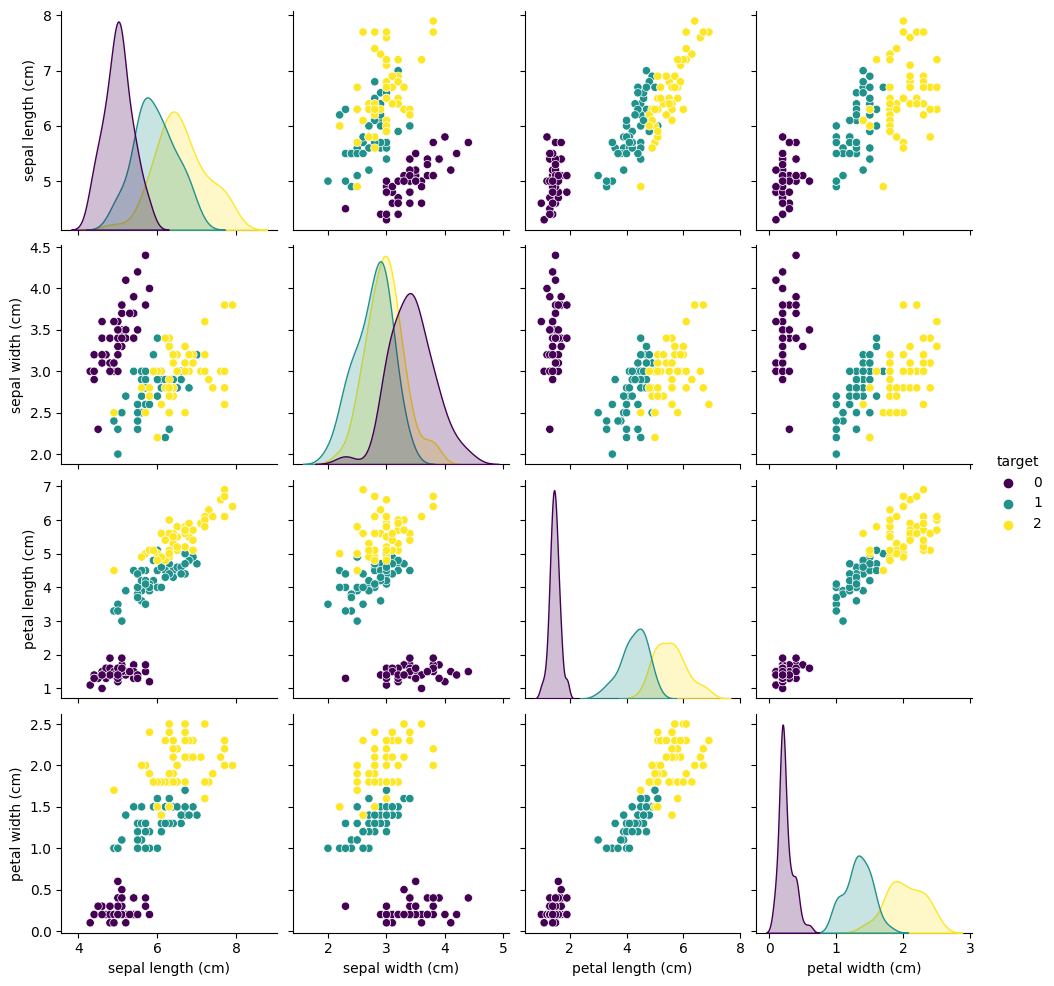

In [ ]:
df = data.join(target)
sns.pairplot(df, hue='target', palette='viridis');

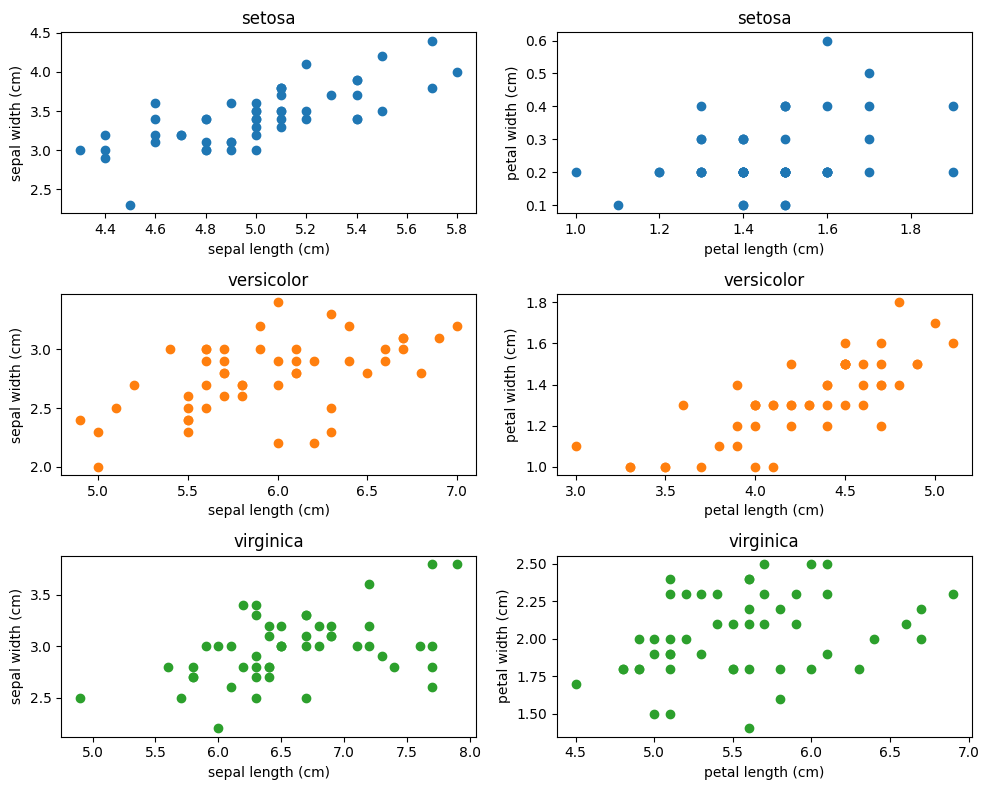

In [98]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(10, 8))
gs = GridSpec(3, 2)
palette = sns.color_palette()
for key, name in enumerate(target_names):
    filtered = df[df['target'] == key]
    ax1 = fig.add_subplot(gs[key, 0])
    ax1.set_title(name)
    ax1.set_xlabel('sepal length (cm)'), ax1.set_ylabel('sepal width (cm)')
    ax1.scatter(filtered['sepal length (cm)'], filtered['sepal width (cm)'], color=palette[key])
    
    ax2 = fig.add_subplot(gs[key, 1])
    ax2.set_title(name)
    ax2.set_xlabel('petal length (cm)'), ax2.set_ylabel('petal width (cm)')
    ax2.scatter(filtered['petal length (cm)'], filtered['petal width (cm)'], color=palette[key])

plt.tight_layout()
plt.show()